# Project - Feature Scaling

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- A sport magazine is writing an article on soccer players
- They have a special interest in left-footed players
- A question is whether they playing style can predict if a player is left-footed
- The questions they want to answer:
    - Can you from a features set on players predict if it is left-footed player
    - If so, what features matters the most

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
svc=SVC()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
ssr=StandardScaler()
mms=MinMaxScaler()


### Step 1.b: Read the data
- Use ```pd.read_parquet()``` to read the file `files/soccer.parquet`
    - The data is from [Kaggle European Soccer Database](https://www.kaggle.com/hugomathien/soccer)
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- Apply ```.head()``` on the data to see all is as expected

In [2]:
data=pd.read_parquet(r"C:\Users\Haseeb Aqeel\Desktop\Data science books\starter\starter\files\soccer.parquet")

In [3]:
data.head(10)

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,53.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,53.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,52.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,51.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [4]:
data.tail(10)

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
183969,102359,39902,2012-08-31 00:00:00,78.0,78.0,right,medium,low,77.0,70.0,...,82.0,78.0,22.0,31.0,30.0,9.0,13.0,8.0,15.0,5.0
183970,102359,39902,2012-02-22 00:00:00,81.0,81.0,right,medium,low,80.0,72.0,...,87.0,78.0,22.0,31.0,30.0,9.0,13.0,8.0,15.0,5.0
183971,102359,39902,2011-08-30 00:00:00,81.0,81.0,right,medium,low,80.0,72.0,...,87.0,78.0,22.0,31.0,30.0,9.0,13.0,8.0,15.0,5.0
183972,102359,39902,2011-02-22 00:00:00,81.0,85.0,right,medium,low,81.0,78.0,...,87.0,73.0,22.0,31.0,30.0,9.0,13.0,8.0,15.0,5.0
183973,102359,39902,2010-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,78.0,...,88.0,73.0,22.0,31.0,30.0,9.0,13.0,8.0,15.0,5.0
183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Apply `info()` to get an idea of the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   183978 non-null  int64  
 1   player_api_id        183978 non-null  int64  
 2   date                 183978 non-null  object 
 3   overall_rating       183142 non-null  float64
 4   potential            183142 non-null  float64
 5   preferred_foot       183142 non-null  object 
 6   attacking_work_rate  180748 non-null  object 
 7   defensive_work_rate  183142 non-null  object 
 8   crossing             183142 non-null  float64
 9   finishing            183142 non-null  float64
 10  heading_accuracy     183142 non-null  float64
 11  short_passing        183142 non-null  float64
 12  volleys              181265 non-null  float64
 13  dribbling            183142 non-null  float64
 14  curve                181265 non-null  float64
 15  free_kick_accurac

### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isnull().any()``` and `.isnull().sum()`

In [6]:
data.isnull().sum()

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

In [7]:
data[data.isna()]

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.shape

(183978, 41)

In [9]:
data=data.drop(['player_fifa_api_id','player_api_id','date'],axis=1)

<AxesSubplot:>

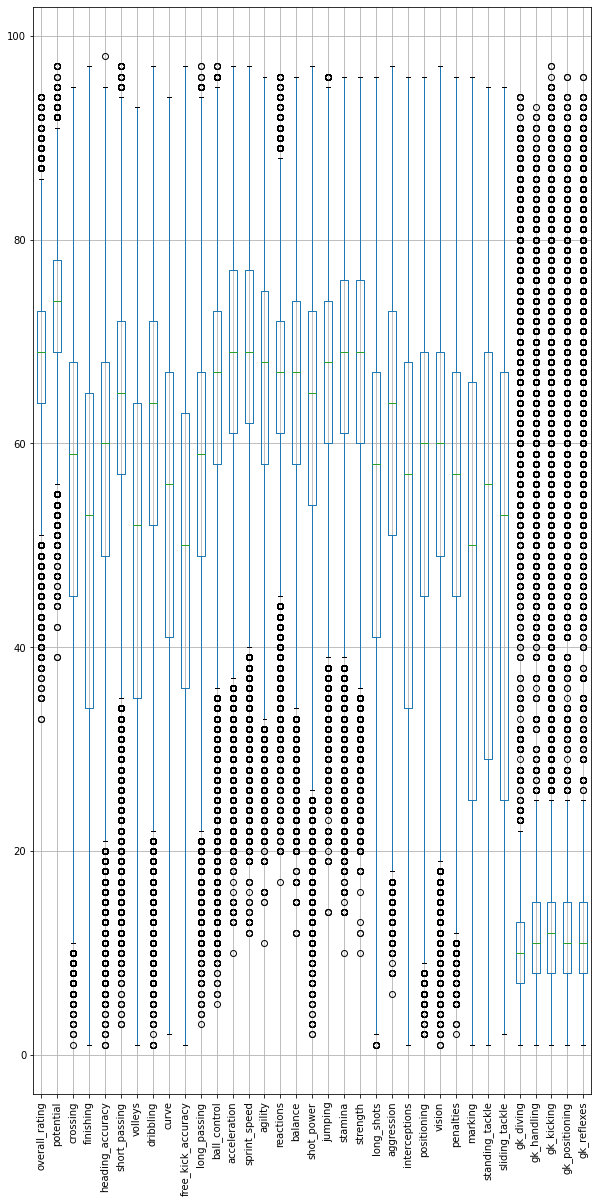

In [10]:
data.boxplot(rot=90,figsize=(10,20))

In [11]:
data.isnull().sum()

overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle         2713
gk_diving               836
gk_handling             836
gk_kicking          

In [12]:
col=list(data.columns)
col

['overall_rating',
 'potential',
 'preferred_foot',
 'attacking_work_rate',
 'defensive_work_rate',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [13]:
for cols in col:
    data=data.fillna(method='ffill')
        

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=['preferred_foot','attacking_work_rate','defensive_work_rate']
for cols in col:
    data[cols]=le.fit_transform(data[cols])


### Step 2.c: Drop missing data
- A great idea is to investigate missing data and outliers
- But for this project we ignore it
- Apply `dropna()`

### Step 2.d: Limite dataset size
- This project is only for demonstration
- Limit the dataset to the first 2000 rows
    - HINT: `iloc[:2000]`

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Feature Selection
- The classifier we want to predict is `preferred_foot` (independent feature/classification)
- For now we keep the other numeric features as depdent features
    - HINT: Use `.info()` to see numeric columns
    - HINT: Use `.drop([...], axis=1)`
- Assign the dependent features to `X` and the independent feature to `y`

In [47]:
data['preferred_foot'].value_counts(normalize=True)

1    0.741541
0    0.258459
Name: preferred_foot, dtype: float64

<AxesSubplot:>

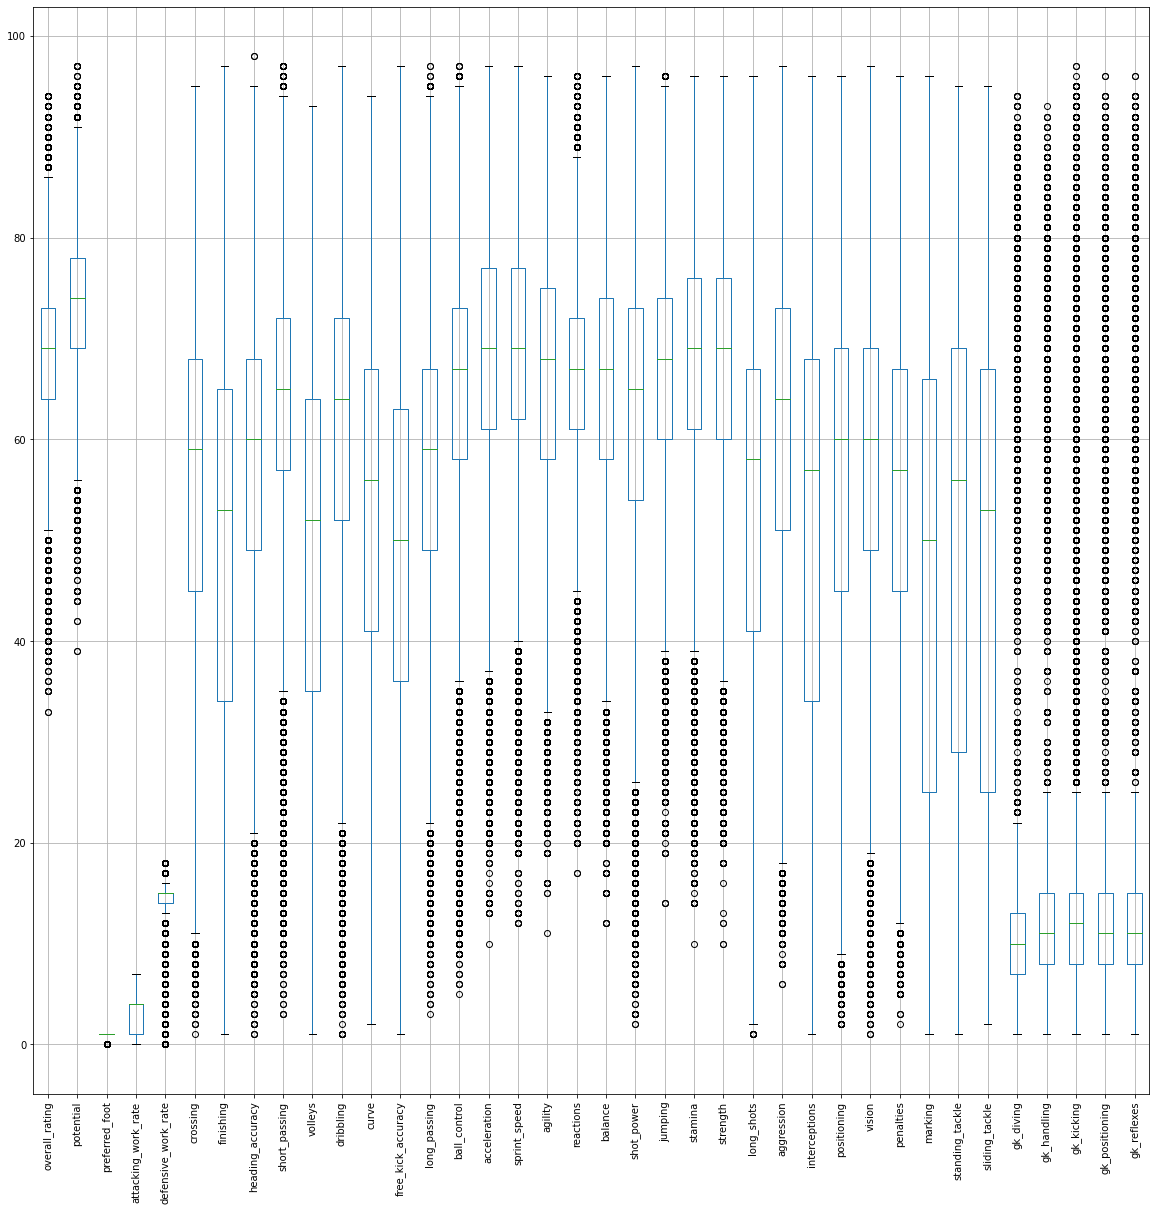

In [16]:
data.boxplot(rot=90,figsize=(20,20))

In [17]:
col=['overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']
for cols in col:  
    Q1=data[cols].quantile(0.25)
    Q3=data[cols].quantile(0.75)
    IQR=Q3-Q1
    lower_limit= Q1 - 1.5*IQR
    upper_limit= Q3 + 1.5*IQR
    data=data[(data[cols]>lower_limit) & (data[cols]<upper_limit)]
data.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,67.0,71.0,1,4,15,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,67.0,71.0,1,4,15,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,62.0,66.0,1,4,15,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,61.0,65.0,1,4,15,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,61.0,65.0,1,4,15,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


<AxesSubplot:>

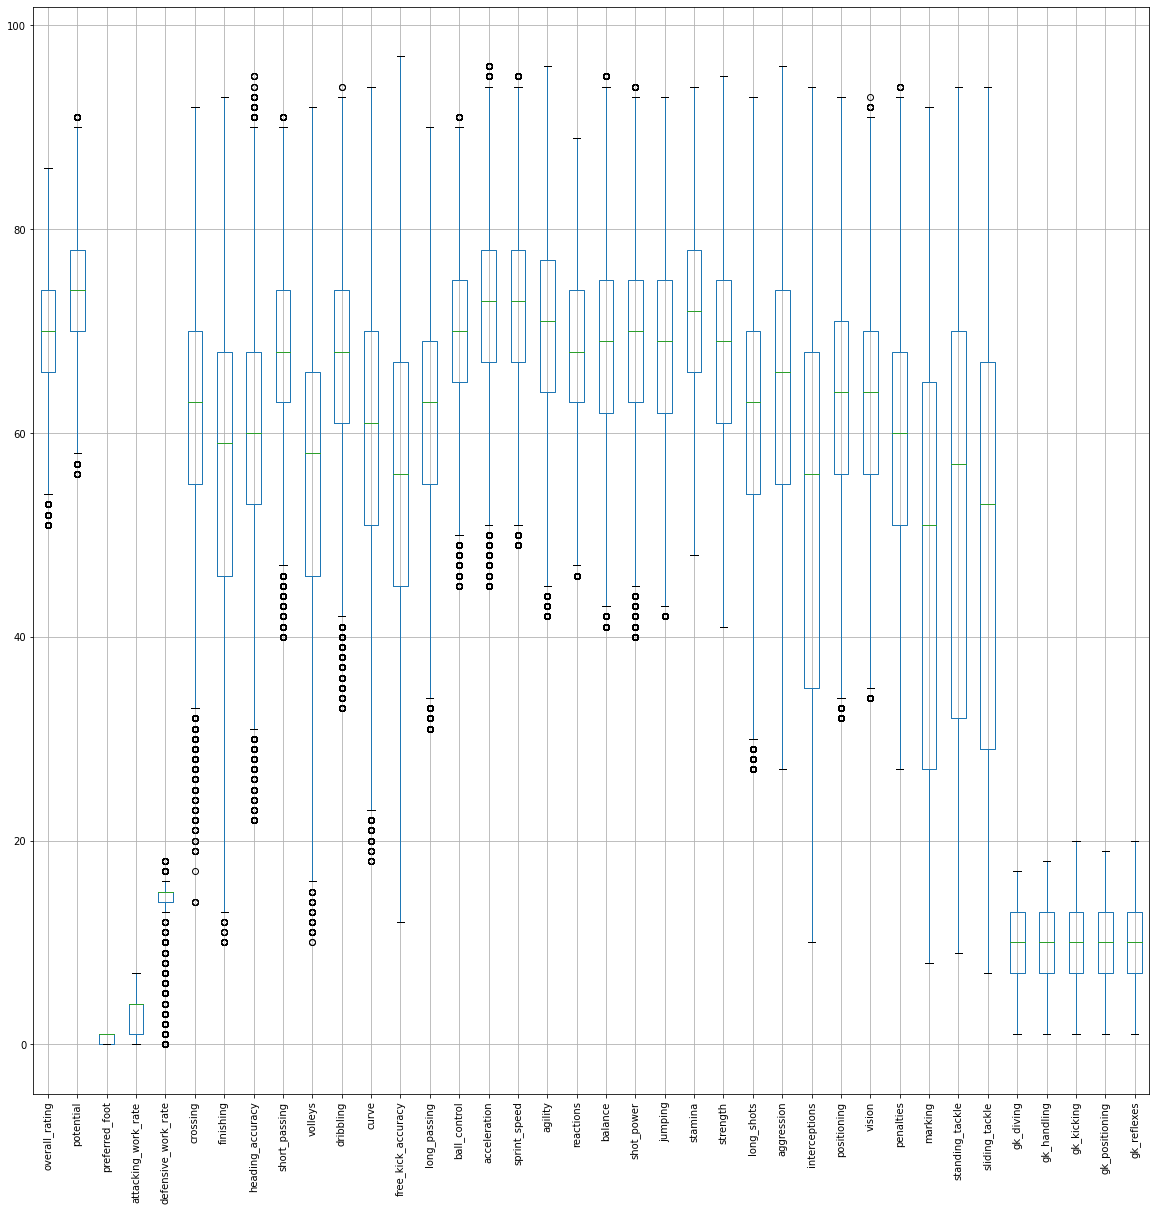

In [18]:
data.boxplot(rot=90,figsize=(20,20))

### Step 3.b: Split into train and test
- Use `train_test_split` to divide into train and test data.
- A great thing is to use `random_state` to be able to reproduce while experimenting
```Python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
```

In [19]:
y=data[['preferred_foot']]
X=data.drop(['preferred_foot'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Step 3.c: Normalize data
- Create a `MinMaxScaler()`
- Fit it on the `X_train` dataset
- Then transform `X_train` and `X_test`
- Remember to assign the results to unique variables

In [20]:
X_test_mms=mms.fit_transform(X_test)
X_train_mms=mms.fit_transform(X_train)

### Step 3.c: Standardize data
- Create a `StandardScaler()`
- Fit it on the `X_train` dataset
- Then transform `X_train` and `X_test`
- Remember to assign the results to unique variables

In [21]:
X_test_ssr=ssr.fit_transform(X_test)
X_train_ssr=ssr.fit_transform(X_train)

### Step 3.d: Compare sets
- For the Original, Normalized, and Standardized datasets
    - Create a `SVM` model and fit it
    - Predict values to calculate an accuracy score
- HINT: For each dataset be inspired by this
```Python
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)
```

In [22]:
svc.fit(X_train, y_train)

C:\Users\Haseeb Aqeel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [23]:
y_pred = svc.predict(X_test)


In [24]:
kn.fit(X_train, y_train)

C:\Users\Haseeb Aqeel\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [33]:
y_pred = kn.predict(X_test)


In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
svc.score(X_test,y_test)

0.7554596926395255

In [27]:
kn.score(X_test,y_test)

0.9602511266032431

In [28]:
lr.score(X_test,y_test)

0.09521054909006976

In [30]:
from sklearn.metrics import accuracy_score

In [32]:
svc_accuracy_score=accuracy_score(y_test, y_pred)

In [35]:
kn_accuracy_score=accuracy_score(y_test, y_pred)
kn_accuracy_score

0.9602511266032431

### Step 3.e: Normalization and standarization rule accuracy
   

### SVC MMS

In [36]:
svc.fit(X_train_mms, y_train)

C:\Users\Haseeb Aqeel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [38]:
svc.score(X_test_mms,y_test)

0.8527519932211224

### KN MMS

In [37]:
kn.fit(X_train_mms, y_train)

C:\Users\Haseeb Aqeel\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [39]:
kn.score(X_test_mms,y_test)

0.9663752262835573

### SVC SSR

In [40]:
svc.fit(X_train_ssr, y_train)

C:\Users\Haseeb Aqeel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [43]:
svc.score(X_test_ssr,y_test)

0.8669645264414744

### KN SSR

In [42]:
kn.fit(X_train_ssr, y_train)

C:\Users\Haseeb Aqeel\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [45]:
kn.score(X_test_ssr,y_test)

0.967877363940993

### Step 3.e: Finding most important feature
- We now know that the features can predict if a player is left-footed
- Now we need to find the most important features
- [`permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html) Permutation importance for feature evaluation.
- We will use the standardized data and fit a new `SVC` model
- Then use the `permutation_importance` to calculate it.
```Python
perm_importance = permutation_importance(svc, X_test_stand, y_test)
```
- The results will be found in `perm_importance.importances_mean`

### Step 3.f: Visualize the results
- To visualize the result we want the most important features sorted
- This can be `perm_importance.importances_mean.argsort()`
    - HINT: assign it to `sorted_idx`
- Then to visualize it we will create a DataFrame
```Python
pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
```
- Then make a `barh` plot (use `figsize`)

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Present findings
- There are many ways to present the findings.
- Be creative
- Ideas
    - Explore how the features are related to the value

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a: Reflection
- There might not be any actions?